In [2]:
# Imports
import random

In [3]:
import math

class Vertex:
    def __init__(self, key, x, y):
        self.key = key
        self.x = x
        self.y = y
        self.d = float('-inf')  # Distance from source
        self.h = None  # Heuristic distance to destination
        self.pi = None
        self.pi_set = set()
        self.priority = 0
        self.parent = None

    def __lt__(self, other):
        return self.priority < other.priority

    def __gt__(self, other):
        return self.priority > other.priority


class Graph:
    def __init__(self):
        self.vertices = {}
        self.adjacency_list = {}

    def add_vertex(self, key, x, y):
        if key not in self.vertices:
            self.vertices[key] = Vertex(key, x, y)
            self.adjacency_list[key] = []

    def add_edge(self, u, v):
        if u in self.vertices and v in self.vertices and u != v:
            if v not in self.adjacency_list[u]:
                self.adjacency_list[u].append(v)
            if u not in self.adjacency_list[v]:
                self.adjacency_list[v].append(u)  # For undirected graph


    def get_adjacency_list(self, vertex_key):
        if vertex_key in self.vertices:
            return self.adjacency_list[vertex_key]
        else:
            return []
    
    def max_degree(self):
        max_degree = 0
        for vertex_key in self.vertices.keys():
            degree = len(self.adjacency_list[vertex_key])
            max_degree = max(max_degree, degree)
        return max_degree
    
    def average_degree(self):
        total_degree = 0
        for vertex_key in self.vertices.keys():
            total_degree += len(self.adjacency_list[vertex_key])
        if len(self.vertices) > 0:
            return total_degree / len(self.vertices)
        else:
            return 0

    def generate_geometric_graph(self, n, r):

        for key in range(n):
            self.add_vertex(key,random.uniform(0, 1), random.uniform(0, 1))

        for u in self.vertices:
            for v in self.vertices:
                if u != v and euclidean_distance(self.vertices[u], self.vertices[v]) <= r:
                    self.adjacency_list[u].append(v)
                    self.adjacency_list[v].append(u)


def euclidean_distance(v1, v2):
    return math.sqrt(((v1.x - v2.x) ** 2) + ((v1.y - v2.y) ** 2))

In [4]:
n_values = [300, 400, 500]
min_ratios = [0.9, 0.8, 0.7]
max_ratios = [0.95, 0.9, 0.8]

graph = Graph()

def largest_connected_component(graph):
    def dfs(graph, visited, vertex, component):
        visited.add(vertex)
        component.append(vertex)
        for neighbor in graph.get_adjacency_list(vertex):
            if neighbor not in visited:
                dfs(graph, visited, neighbor, component)

    visited = set()
    largest_component = []
    for vertex in graph.vertices:
        if vertex not in visited:
            component = []
            dfs(graph, visited, vertex, component)
            if len(component) > len(largest_component):
                largest_component = component

    lcc_graph = Graph()
    for vertex_key in largest_component:
        vertex = graph.vertices[vertex_key]
        lcc_graph.add_vertex(vertex.key, vertex.x, vertex.y)
        for neighbor_key in graph.get_adjacency_list(vertex_key):
            if neighbor_key in largest_component:
                lcc_graph.add_edge(vertex.key, neighbor_key)

    return lcc_graph


def binary_search_r(n, min_ratio, max_ratio):
    low = 0.0
    high = 1.0
    while low <= high:
        graph = Graph()
        mid = (low + high) / 2
        vlcc_min = int(min_ratio * n)
        vlcc_max = int(max_ratio * n)
        graph.generate_geometric_graph(n, mid)
        lcc = largest_connected_component(graph)
        lcc_size = len(lcc.vertices)
        if vlcc_min <= lcc_size <= vlcc_max:
            return mid, lcc
        elif lcc_size > vlcc_min:
            high = mid - 0.00001
        else:
            low = mid + 0.00001
    return None, None  # No suitable r found


def store_graph_to_file(graph, filename):
    with open(filename, 'w') as f:
        processed_edges = set()  # To avoid duplicates
        for u in graph.vertices:
            for v in graph.get_adjacency_list(u):
                # Generate a unique key for the edge (u, v) by sorting the vertices' keys
                edge_key = (u, v) if u < v else (v, u)
                if edge_key not in processed_edges:
                    vertex_u = graph.vertices[u]
                    vertex_v = graph.vertices[v]
                    f.write(f"{u} {vertex_u.x} {vertex_u.y} {v} {vertex_v.x} {vertex_v.y}\n")
                    processed_edges.add(edge_key)


n_values = [300, 400, 500]
min_ratios = [0.9, 0.8, 0.7]
max_ratios = [0.95, 0.9, 0.8]

# for n, min_ratio, max_ratio in zip(n_values, min_ratios, max_ratios):
#     r, lcc = binary_search_r(n, min_ratio, max_ratio)
#     if r is not None:
#         store_graph_to_file(lcc, f"graph_n{n}_r{r}.EDGES")
#         print(f"Graph with n={n} and r={r} stored successfully.")
#     else:
#         print(f"No suitable r found for n={n}.")


In [22]:
def read_graph_from_file(filename):
    graph = Graph()
    with open(filename, 'r') as f:
        for line in f:
            data = line.split()
            u = int(data[0])
            x1 = float(data[1])
            y1 = float(data[2])
            v = int(data[3])
            x2 = float(data[4])
            y2 = float(data[5])

            if u not in graph.vertices:
                graph.add_vertex(u, x1, y1)
            if v not in graph.vertices:
                graph.add_vertex(v, x2, y2)

            graph.add_edge(u, v)

    return graph


graph = read_graph_from_file("graph_n300_r0.08202289062500001.EDGES")

if 13 in graph.vertices:
    print("yes")


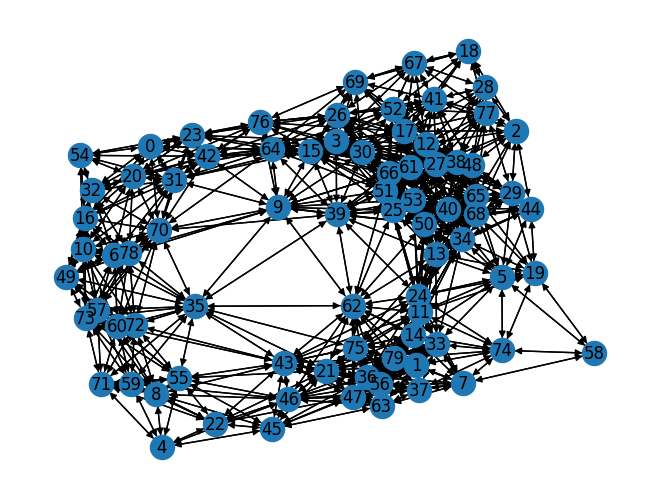

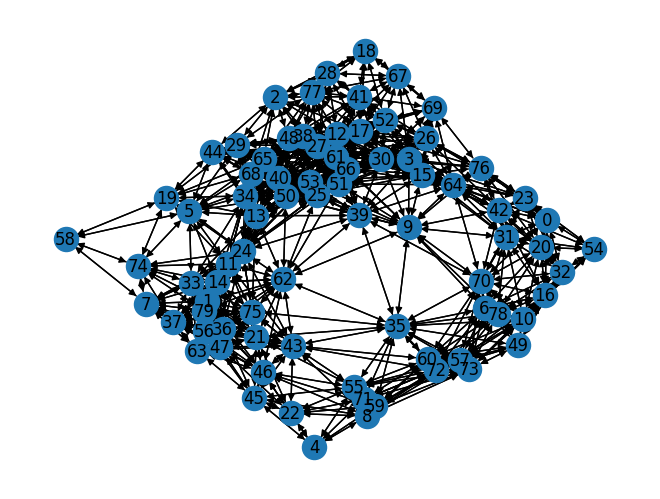

In [24]:
import networkx as nx
import matplotlib.pyplot as plt


def draw_graph(edges=None, cordinates=None, adj_list=None):
    G = nx.DiGraph()
    if adj_list:
        G.add_nodes_from(adj_list.keys())
        for k, v in adj_list.items():
            G.add_edges_from(([(k, t) for t in v]))
        nx.draw(G, with_labels=True)
        plt.show()
    else:
        G.add_nodes_from(cordinates.keys())
        nx.set_node_attributes(G, cordinates, 'pos')
        adjacency_list = {}
        for u, v in edges:
            adjacency_list.setdefault(u, []).append(v)
            adjacency_list.setdefault(v, []).append(u)
        for k, v in adjacency_list.items():
            G.add_edges_from(([(k, t) for t in v]))
        _, ax = plt.subplots(figsize=(10, 5))
        nx.draw(G, pos=nx.get_node_attributes(G, 'pos'), with_labels=True, ax=ax)
        ax.set_axis_on()
        ax.tick_params(left=True, bottom=True, labelleft=True, labelbottom=True)

# Generate a random geometric graph
n = 80  # Number of vertices
r = 0.3  # Maximum distance for edge creation
graph = Graph()

graph.generate_geometric_graph(n, r)
draw_graph(adj_list=graph.adjacency_list)

lcc = largest_connected_component(graph)
draw_graph(adj_list=lcc.adjacency_list)


In [12]:
#  A star
import heapq

def initialize_single_source_max(graph, source, destination):
    for vertex in graph.vertices.values():
        vertex.d = float('-inf')
        vertex.h = euclidean_distance(vertex, destination)
        vertex.pi = None
        vertex.pi_set = set()

    source.d = 0

def relax_max(u, v):
    if v.d < (u.d + 1):
        v.d = u.d + 1
        v.pi = u
        return True
    return False

def a_star_max(graph, source, destination):
    initialize_single_source_max(graph, source, destination)
    closed_set = set()
    open_heap = []
    heapq.heappush(open_heap, (-source.d - source.h, source))
    
    while open_heap:
        _, u = heapq.heappop(open_heap)
        closed_set.add(u)

        if u == destination:
            break

        for v_key in graph.get_adjacency_list(u.key):
            v = graph.vertices[v_key]
            if v in closed_set:
                continue
            if relax_max(u, v):
                v.priority = v.d + v.h
                heapq.heappush(open_heap, (-v.priority, v))

final_path = []

for i in range(0, len(graph.vertices)):
    if i in graph.vertices:
        for j in range(0, len(graph.vertices)):
            if i != j and j in graph.vertices:
                s = graph.vertices[i]
                d = graph.vertices[j]
                a_star_max(graph, s, d)
                path = []
                x = d
                if x.d != float('-inf'):
                    visited = {x}
                    while x != s:
                        path.insert(0, x.key)
                        visited.add(x)
                        x = x.pi
                        if x in visited:
                            break
                    path.insert(0, s.key)
                    if (len(path) > len(final_path)):
                        final_path = path


print(final_path)
print(len(final_path))

[1, 7, 6, 13, 10, 17, 8, 19, 16, 14, 9, 3, 2, 5, 18, 12, 11, 4, 0]
19


In [29]:
#DFS

def DFSAlgo(graph):
    def dfs(node, visited, path, memo):
        nonlocal max_length, longest_path
        visited[node] = True
        path.append(node)

        for neighbor in graph.adjacency_list[node]:
            if not visited[neighbor]:
                if neighbor not in memo or len(memo[neighbor]) < len(path):
                    dfs(neighbor, visited, path, memo)

        if len(path) > max_length:
            max_length = len(path)
            longest_path = path.copy()

        path.pop()
        visited[node] = False
        memo[node] = path.copy()

    max_length = float('-inf')
    longest_path = []

    visited = {v: False for v in graph.vertices}
    memo = {}

    for vertex in graph.vertices:
        if not visited[vertex]:
            dfs(vertex, visited, [], memo)

    return longest_path


a = DFSAlgo(graph)
print(a)
print(len(a))


[68, 66, 65, 61, 52, 51, 50, 48, 44, 40, 38, 34, 29, 27, 25, 17, 15, 9, 6, 10, 16, 0, 20, 23, 3, 12, 2, 18, 28, 41, 26, 30, 39, 13, 1, 7, 11, 5, 14, 21, 22, 4, 8, 43, 35, 62, 56, 24, 33, 36, 37, 46, 45, 55, 57, 49, 32, 31, 42, 64, 70, 60, 59, 71, 72, 73, 78]
67


In [30]:
#dijkstra
import heapq

def dijkstra_longest_path(graph, start):
    distances = {vertex: float('-inf') for vertex in graph.vertices}
    distances[start] = 0
    previous = {vertex: None for vertex in graph.vertices}

    pq = [(0, start)]  # Priority queue (distance, vertex)
    visited = set()

    while pq:
        distance, node = heapq.heappop(pq)

        if node in visited:
            continue

        visited.add(node)

        for neighbor in graph.adjacency_list[node]:
            if neighbor not in visited:
                new_distance = distances[node] + 1  # Assuming unweighted graph
                if new_distance > distances[neighbor]:
                    distances[neighbor] = new_distance
                    previous[neighbor] = node
                    heapq.heappush(pq, (-new_distance, neighbor))

    return distances, previous

def construct_path(previous, start, end):
    path = []
    current = end
    while current is not None:
        path.append(current)
        current = previous[current]
    path.reverse()
    return path

def longest_path_dijkstra(graph):
    max_length = float('-inf')
    longest_path = []

    for vertex in graph.vertices:
        distances, previous = dijkstra_longest_path(graph, vertex)
        longest_distance = max(distances.values())
        if longest_distance > max_length:
            max_length = longest_distance
            end_vertex = max(distances, key=distances.get)
            longest_path = construct_path(previous, vertex, end_vertex)

    return longest_path, max_length

# Example usage:
# Replace Graph with your graph implementation
# graph = Graph()  # Assuming you have a graph instance
longest_path, length = longest_path_dijkstra(graph)
print(longest_path)
print(length)
# print("Length:", length)


[58, 5, 11, 1, 7, 14, 13, 19, 24, 21, 22, 4, 8, 43, 35, 6, 9, 3, 12, 2, 17, 15, 0, 16, 10, 20, 23, 26, 27, 25, 30, 38, 28, 18, 41, 48, 29, 34, 33, 36, 37, 46, 45, 47, 56, 62, 39, 40, 44, 50, 51, 52, 61, 53, 65, 66, 64, 31, 32, 42, 70, 49, 57, 55, 59, 60, 71, 72, 73, 78]
69


In [31]:
def topological_sort(graph):
    # Perform topological sorting using Depth First Search (DFS)
    visited = set()
    stack = []

    def dfs(vertex):
        visited.add(vertex)
        for neighbor in graph.get_adjacency_list(vertex):
            if neighbor not in visited:
                dfs(neighbor)
        stack.append(vertex)

    for vertex in graph.vertices.keys():
        if vertex not in visited:
            dfs(vertex)

    return stack[::-1]

def longest_path_dag(graph):
    topological_order = topological_sort(graph)
    longest_paths = {vertex: 0 for vertex in graph.vertices.keys()}
    
    for vertex in topological_order:
        for neighbor in graph.get_adjacency_list(vertex):
            longest_paths[neighbor] = max(longest_paths[neighbor], longest_paths[vertex] + 1)

    # Find the vertex with the maximum length of the longest path
    end_vertex_key = max(longest_paths, key=longest_paths.get)
    length_longest_path = longest_paths[end_vertex_key]

    return length_longest_path

# Example usage:
# Replace Graph with your graph implementation
# graph = Graph()  # Assuming you have a graph instance
longest_path_length = longest_path_dag(graph)
print(longest_path_length)
print("Length of the longest path:", longest_path_length)

63
Length of the longest path: 63
